+ Classification and Regression Trees

# Importing Libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

#### Defining the columns name to import

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Importing Dataset

In [3]:
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Split dataset in features and target variable

In [4]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']#feature selection
X = pima[feature_cols] # Features
y = pima.label # Target variable

# Split dataset into training set and test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(537, 7) (231, 7) (537,) (231,)


# Create Decision Tree classifer object

In [6]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer

In [7]:
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset

In [8]:
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


# Decision Tree Visualization

In [10]:
# Importing Libraries
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

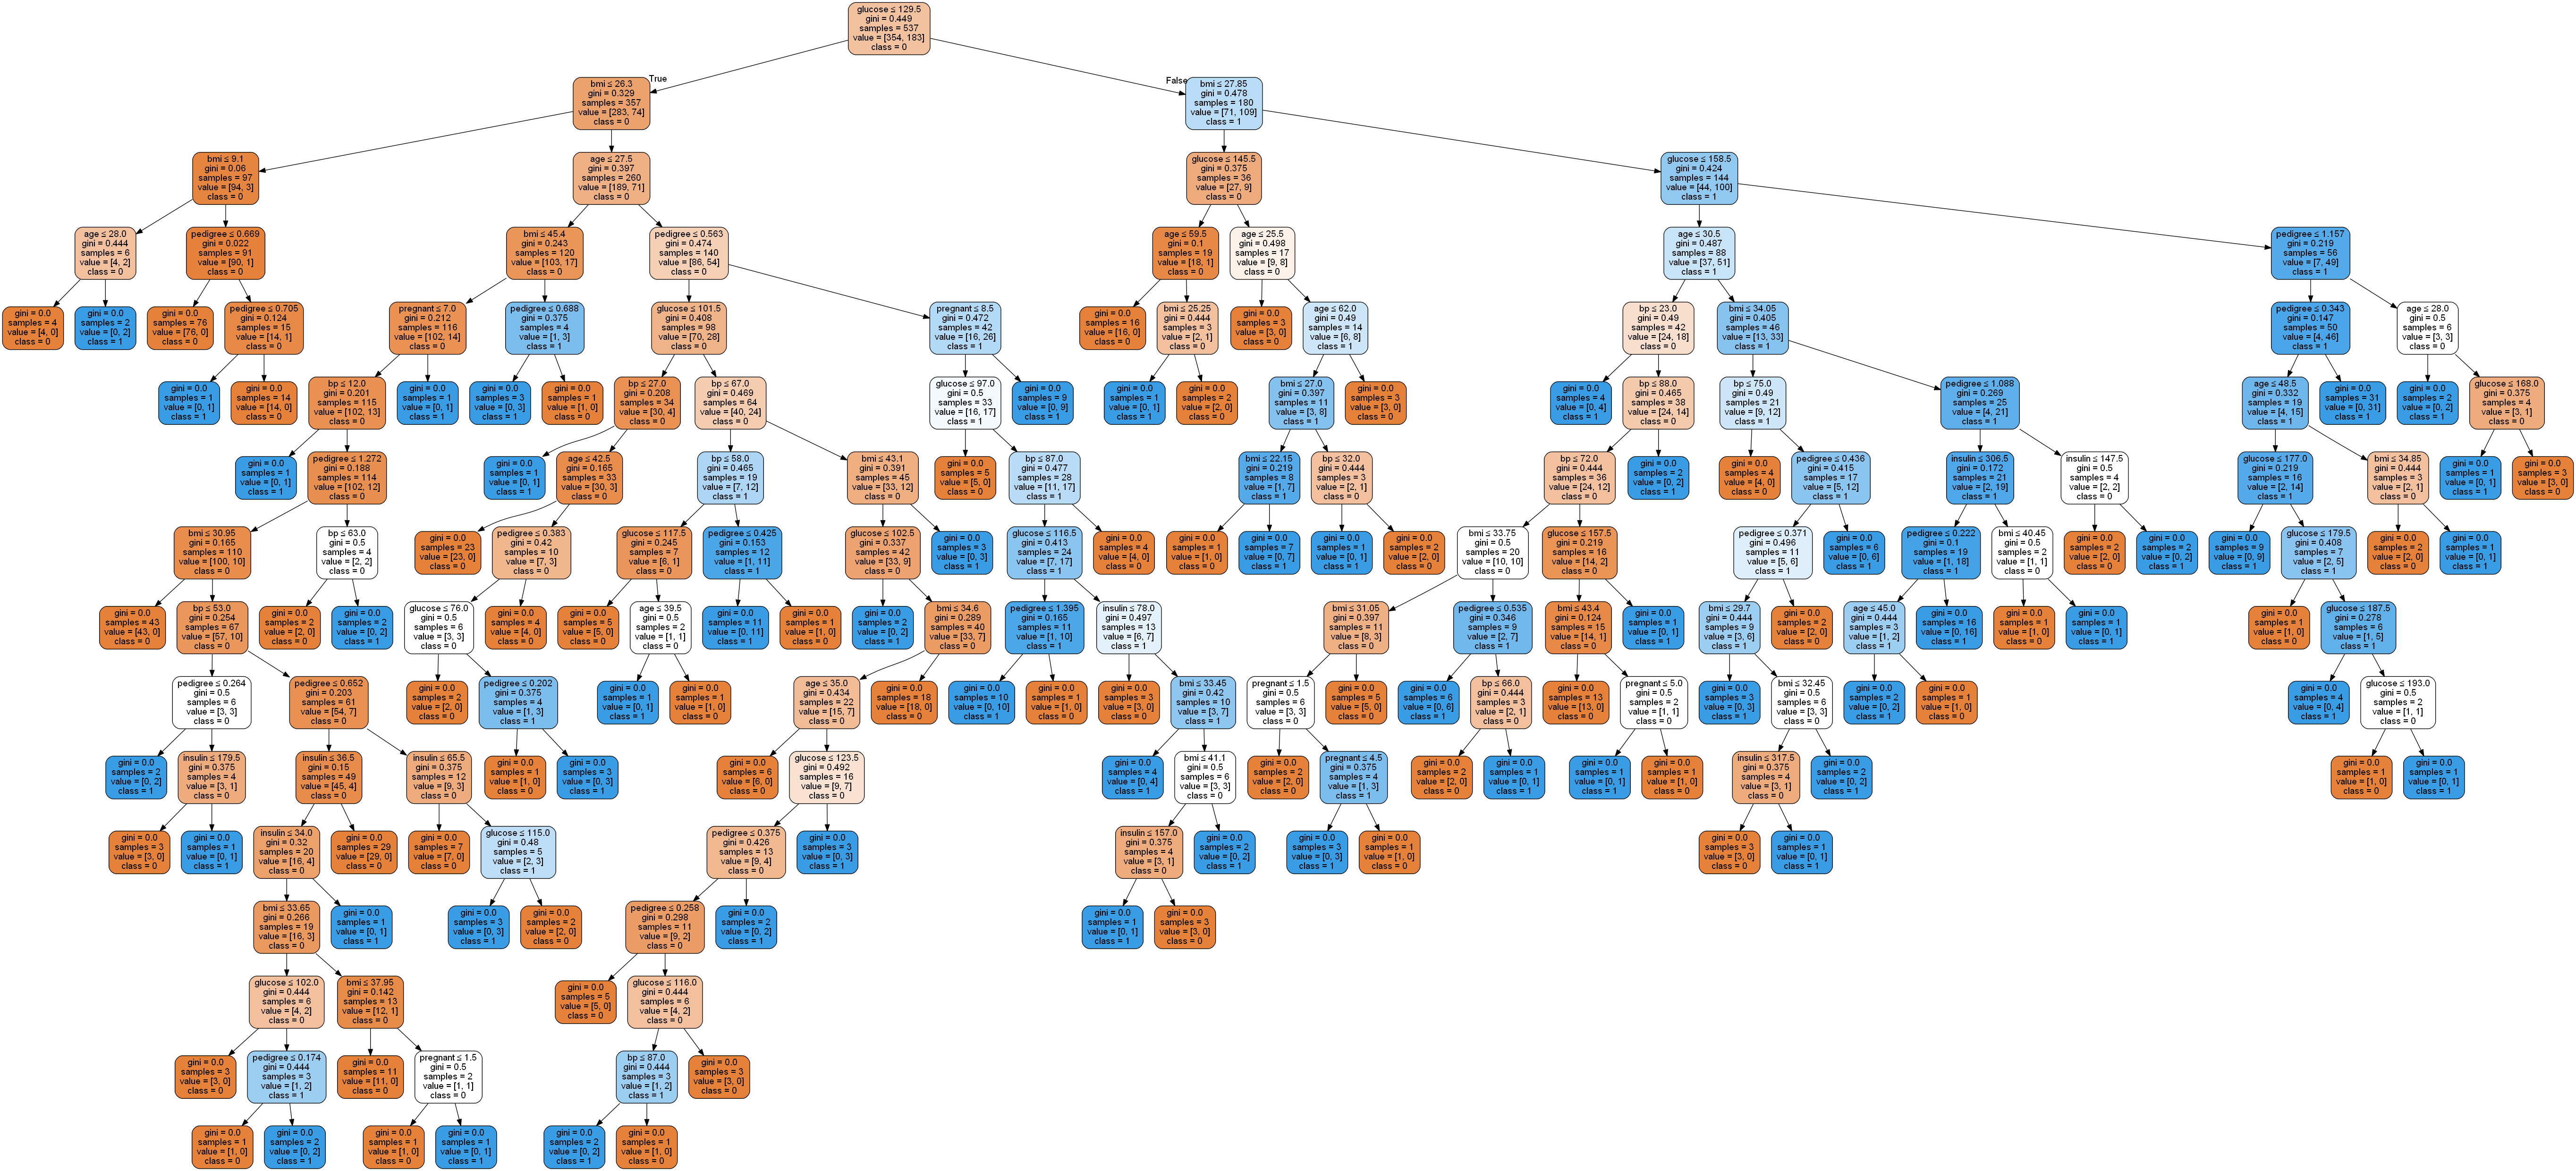

In [11]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())